# Technical Requirements
+ 6 to 8 visualizations (saved as PNG images to be included in the README)
+ one python library we have never used in class
+ use at least one API
+ create a README in the repo summarizing major findings

# Presentation Requirements
+ 8-10 mins long
+ describe our core mesage/hypothesis
+ describe the questions we found interesting and what were our motivations to answer them
+ describe the data exploration and cleanup process
+ describe the analysis process
+ summarize conclusions (numerical and visual summary)
+ discuss implications of our findings
+ tell a good story

# Tasks
+ explore questions:
    + What happens to employment, interest rates, money, stocks, bonds and liquidity after a technical recession?
    + What do recoveries look like?
    + What will this recession and recovery look like?
+ find/explore APIs/datasets:
    + FRED API
    + FTSE All World ex US Index (VFWIX)
+ figure out which tools we will use:
    + monte carlo
    + correlation maps
    + SQL database
    + dashboard w/ interactive plots
+ create dataframes:
    + macro (employment, interest, and money)
    + market (stocks, bonds, and liquidity(spreads and volume))
+ analyze data
+ plot data

# One year post start of a recession data
+ Recession 1: Q1 2008-Q4 2008 (January 1 2008-December 31 2008)
+ Recession 2: Q2 2001-Q1 2002 (April 1 2001-March 31 2002)
+ Recession 3: Q1 1990-Q4 1990 (January 1 1990-December 31 1990)
+ Recession 4: Q3 1981-Q2 1982 (July 1 1981-June 30 1982)
+ Recession 5: Q3 1979-Q2 1980 (July 1 1979-June 30 1980)
+ Recession 6: Q1 1974-Q4 1974 (January 1 1974-December 31 1974)
+ Recession 7: Q3 1969-Q2 1970 (July 1 1969-June 30 1970)
+ Recession 8: Q4 1960-Q3 1960 (October 1 1960-September 30 1961)
+ Recession 9: Q1 1958-Q4 1958 (January 1 1958-December 31 1958)
+ Recession 10: Q1 1954-Q4 1954 (January 1 1954-December 31 1954)
+ Recession 11: Q2 1949-Q1 1950 (April 1 1949-March 31 1950)
+ Recession 12: Q3 1945-Q2 1946 (July 1 1945-June 30 1946)
+ Recession 13: Q1 1938-Q4 1938 (January 1 1938-December 31 1938)
+ Recession 14: Q1 1930-Q4 1930 (January 1 1930-December 31 1930)

# Import libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
import requests
import json
from fredapi import Fred
from panel.interact import interact
from panel import widgets
pn.extension("plotly")

# Load environment variables and set keys

In [2]:
#Load environment variables
from dotenv import load_dotenv
load_dotenv()

#Set API keys
fred_api_key = os.getenv("FRED_API_KEY")

#Initiate response
fred = Fred(api_key=fred_api_key)

# Retreive data

In [3]:
#Retreive GDP data for one year increments post recession start
GDP1 = fred.get_series('GDP', observation_start='2008-01-01', observation_end='2008-12-31')
GDP2 = fred.get_series('GDP', observation_start='2001-04-01', observation_end='2002-03-31')
GDP3 = fred.get_series('GDP', observation_start='1990-01-01', observation_end='1990-12-31')
GDP4 = fred.get_series('GDP', observation_start='1981-07-01', observation_end='1982-06-30')
GDP5 = fred.get_series('GDP', observation_start='1979-07-01', observation_end='1980-06-30')
GDP6 = fred.get_series('GDP', observation_start='1974-01-01', observation_end='1974-12-31')
GDP7 = fred.get_series('GDP', observation_start='1969-07-01', observation_end='1970-06-30')
GDP8 = fred.get_series('GDP', observation_start='1960-10-01', observation_end='1961-09-30')
GDP9 = fred.get_series('GDP', observation_start='1958-01-01', observation_end='1958-12-31')
GDP10 = fred.get_series('GDP', observation_start='1954-01-01', observation_end='1954-12-31')
GDP11= fred.get_series('GDP', observation_start='1949-04-01', observation_end='1950-03-31')

In [4]:
#Retreive unemployment data for one year increments post recession start
unemployment_rate1= fred.get_series('UNRATE', observation_start='2008-01-01', observation_end='2008-12-31')
unemployment_rate2= fred.get_series('UNRATE', observation_start='2001-04-01', observation_end='2002-03-31')
unemployment_rate3= fred.get_series('UNRATE', observation_start='1990-01-01', observation_end='1990-12-31')
unemployment_rate4= fred.get_series('UNRATE', observation_start='1981-07-01', observation_end='1982-06-30')
unemployment_rate5= fred.get_series('UNRATE', observation_start='1979-07-01', observation_end='1980-06-30')
unemployment_rate6= fred.get_series('UNRATE', observation_start='1974-01-01', observation_end='1974-12-31')
unemployment_rate7= fred.get_series('UNRATE', observation_start='1969-07-01', observation_end='1970-06-30')
unemployment_rate8= fred.get_series('UNRATE', observation_start='1960-10-01', observation_end='1961-09-30')
unemployment_rate9= fred.get_series('UNRATE', observation_start='1958-01-01', observation_end='1958-12-31')
unemployment_rate10= fred.get_series('UNRATE', observation_start='1954-01-01', observation_end='1954-12-31')
unemployment_rate11= fred.get_series('UNRATE', observation_start='1949-04-01', observation_end='1950-03-31')

In [5]:
#Retreive federal funds rate data for one year increments post recession start
ff_rate1=fred.get_series('DFF', observation_start='2008-01-01', observation_end='2008-12-31')
ff_rate2=fred.get_series('DFF', observation_start='2001-04-01', observation_end='2002-03-31')
ff_rate3=fred.get_series('DFF', observation_start='1990-01-01', observation_end='1990-12-31')
ff_rate4=fred.get_series('DFF', observation_start='1981-07-01', observation_end='1982-06-30')
ff_rate5=fred.get_series('DFF', observation_start='1979-07-01', observation_end='1980-06-30')
ff_rate6=fred.get_series('DFF', observation_start='1974-01-01', observation_end='1974-12-31')
ff_rate7=fred.get_series('DFF', observation_start='1969-07-01', observation_end='1970-06-30')
ff_rate8=fred.get_series('DFF', observation_start='1960-10-01', observation_end='1961-09-30')
ff_rate9=fred.get_series('DFF', observation_start='1958-01-01', observation_end='1958-12-31')

In [6]:
#Retreive M2 velocity data for one year increments post recession start
M2_velocity1=fred.get_series('M2V', observation_start='2008-01-01', observation_end='2008-12-31')
M2_velocity2=fred.get_series('M2V', observation_start='2001-04-01', observation_end='2002-03-31')
M2_velocity3=fred.get_series('M2V', observation_start='1990-01-01', observation_end='1990-12-31')
M2_velocity4=fred.get_series('M2V', observation_start='1981-07-01', observation_end='1982-06-30')
M2_velocity5=fred.get_series('M2V', observation_start='1979-07-01', observation_end='1980-06-30')
M2_velocity6=fred.get_series('M2V', observation_start='1974-01-01', observation_end='1974-12-31')
M2_velocity7=fred.get_series('M2V', observation_start='1969-07-01', observation_end='1970-06-30')
M2_velocity8=fred.get_series('M2V', observation_start='1960-10-01', observation_end='1961-09-30')

In [7]:
#Retreive M2 data for one year increments post recession start
M2_1=fred.get_series('M2REAL',observation_start='2008-01-01', observation_end='2008-12-31')
M2_2=fred.get_series('M2REAL',observation_start='2001-04-01', observation_end='2002-03-31')
M2_3=fred.get_series('M2REAL',observation_start='1990-01-01', observation_end='1990-12-31')
M2_4=fred.get_series('M2REAL',observation_start='1981-07-01', observation_end='1982-06-30')
M2_5=fred.get_series('M2REAL',observation_start='1979-07-01', observation_end='1980-06-30')
M2_6=fred.get_series('M2REAL',observation_start='1974-01-01', observation_end='1974-12-31')
M2_7=fred.get_series('M2REAL',observation_start='1969-07-01', observation_end='1970-06-30')
M2_8=fred.get_series('M2REAL',observation_start='1960-10-01', observation_end='1961-09-30')

In [8]:
#Retreive S&P 500 data

#Set file path
file_path = Path("spx_history.csv")

#Read CSV
sp500_df=pd.read_csv(file_path)

#Manipulate dataframe
sp500_df.dropna(inplace=True)
sp500_df.drop(index=4, inplace=True)
sp500_df.columns= ["Date", "Closing Price"]
sp500_df.reset_index(drop=True, inplace=True)
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'], format='%m/%d/%Y')
sp500_df.head()

,Date,Closing Price
0,1927-12-30,17.66
1,1928-01-02,17.66
2,1928-01-03,17.76
3,1928-01-04,17.72
4,1928-01-05,17.55


In [9]:
# Pull recession data
Recession_1 = sp500_df.loc[(sp500_df["Date"]>="01/01/2008")&(sp500_df["Date"]<="12/31/2008")]
Recession_2 = sp500_df.loc[(sp500_df["Date"]>="04/01/2001")&(sp500_df["Date"]<="3/31/2002")]
Recession_3 = sp500_df.loc[(sp500_df["Date"]>="01/01/1990")&(sp500_df["Date"]<="12/31/1990")]
Recession_4 = sp500_df.loc[(sp500_df["Date"]>="07/01/1981")&(sp500_df["Date"]<="06/30/1982")]
Recession_5 = sp500_df.loc[(sp500_df["Date"]>="07/01/1979")&(sp500_df["Date"]<="06/30/1980")]
Recession_6 = sp500_df.loc[(sp500_df["Date"]>="01/01/1974")&(sp500_df["Date"]<="12/31/1974")]
Recession_7 = sp500_df.loc[(sp500_df["Date"]>="07/01/1969")&(sp500_df["Date"]<="06/30/1970")]
Recession_8 = sp500_df.loc[(sp500_df["Date"]>="10/01/1960")&(sp500_df["Date"]<="09/30/1961")]
Recession_9 = sp500_df.loc[(sp500_df["Date"]>="01/01/1958")&(sp500_df["Date"]<="12/31/1958")]
Recession_10 = sp500_df.loc[(sp500_df["Date"]>="01/01/1954")&(sp500_df["Date"]<="12/31/1954")]
Recession_11 = sp500_df.loc[(sp500_df["Date"]>="04/01/1949")&(sp500_df["Date"]<="03/31/1950")]
Recession_12 = sp500_df.loc[(sp500_df["Date"]>="07/01/1945")&(sp500_df["Date"]<="06/30/1946")]
Recession_13 = sp500_df.loc[(sp500_df["Date"]>="01/01/1938")&(sp500_df["Date"]<="12/31/1938")]
Recession_14 = sp500_df.loc[(sp500_df["Date"]>="01/01/1930")&(sp500_df["Date"]<="12/31/1930")]

# Create dataframes

In [10]:
#Create GDP dataframe
gdpdfs = [GDP1,GDP2,GDP3,GDP4,GDP5,GDP6,GDP7,GDP8,GDP9,GDP10,GDP11]
for df in gdpdfs:
    df.reset_index(drop=True, inplace=True)

GDP_df= pd.DataFrame(gdpdfs).T
GDP_df.columns = ["Recession 1", "Recession 2", "Recession 3", "Recession 4", "Recession 5", "Recession 6", "Recession 7", "Recession 8", "Recession 9", "Recession 10", "Recession 11"]
GDP_df.head()


,Recession 1,Recession 2,Recession 3,Recession 4,Recession 5,Recession 6,Recession 7,Recession 8,Recession 9,Recession 10,Recession 11
0,14651.039,10597.822,5872.701,3260.609,2667.565,1491.209,1029.956,540.197,467.540,385.345,271.351
1,14805.611,10596.294,5960.028,3280.818,2723.883,1530.056,1038.147,545.018,471.978,386.121,272.889
2,14835.187,10660.294,6015.116,3274.302,2789.842,1560.026,1051.200,555.545,485.841,390.996,270.627
3,14559.543,10788.952,6004.733,3331.972,2797.352,1599.679,1067.375,567.664,499.555,399.734,280.828


In [11]:
#Create unemployment rate dataframe
empdfs = [unemployment_rate1,unemployment_rate2,unemployment_rate3,unemployment_rate4,unemployment_rate5,
          unemployment_rate6,unemployment_rate7,unemployment_rate8,unemployment_rate9,unemployment_rate10,
          unemployment_rate11]

for df in empdfs:
    df.reset_index(drop=True, inplace=True)

unemployment_rate_df= pd.DataFrame(empdfs).T
unemployment_rate_df.columns = ["Recession 1", "Recession 2", "Recession 3", "Recession 4", "Recession 5", "Recession 6", "Recession 7", "Recession 8", "Recession 9", "Recession 10", "Recession 11"]
unemployment_rate_df.head()


,Recession 1,Recession 2,Recession 3,Recession 4,Recession 5,Recession 6,Recession 7,Recession 8,Recession 9,Recession 10,Recession 11
0,5.0,4.4,5.4,7.2,5.7,5.1,3.5,6.1,5.8,4.9,5.3
1,4.9,4.3,5.3,7.4,6.0,5.2,3.5,6.1,6.4,5.2,6.1
2,5.1,4.5,5.2,7.6,5.9,5.1,3.7,6.6,6.7,5.7,6.2
3,5.0,4.6,5.4,7.9,6.0,5.1,3.7,6.6,7.4,5.9,6.7
4,5.4,4.9,5.4,8.3,5.9,5.1,3.5,6.9,7.4,5.9,6.8


In [12]:
#Create federal funds rate dataframe
ffdfs = [ff_rate1,ff_rate2,ff_rate3,ff_rate4,ff_rate5,ff_rate6,ff_rate7,ff_rate8,ff_rate9]

for df in ffdfs:
    df.reset_index(drop=True, inplace=True)

ff_rate_df= pd.DataFrame(ffdfs).T
ff_rate_df.columns = ["Recession 1", "Recession 2", "Recession 3", "Recession 4", "Recession 5", "Recession 6", "Recession 7", "Recession 8", "Recession 9"]
ff_rate_df.head()


,Recession 1,Recession 2,Recession 3,Recession 4,Recession 5,Recession 6,Recession 7,Recession 8,Recession 9
0,3.06,5.29,7.97,21.09,10.54,9.83,8.75,3.00,3.0
1,4.11,5.30,8.54,20.54,10.66,9.72,5.50,3.00,3.0
2,4.25,5.10,8.37,19.83,10.05,9.80,9.50,2.75,3.0
3,4.18,5.01,8.29,19.83,10.05,9.84,9.50,2.50,3.0
4,4.18,5.04,8.20,19.83,10.33,9.84,9.50,2.75,3.0


In [13]:
#Create M2 velocity dataframe
m2vdfs = [M2_velocity1,M2_velocity2,M2_velocity3,M2_velocity4,M2_velocity5,M2_velocity6,M2_velocity7,M2_velocity8]

for df in m2vdfs:
    df.reset_index(drop=True, inplace=True)

M2_velocity_df= pd.DataFrame(m2vdfs).T
M2_velocity_df.columns = ["Recession 1", "Recession 2", "Recession 3", "Recession 4", "Recession 5", "Recession 6", "Recession 7", "Recession 8"]
M2_velocity_df.head()

,Recession 1,Recession 2,Recession 3,Recession 4,Recession 5,Recession 6,Recession 7,Recession 8
0,1.935,2.064,1.848,1.925,1.846,1.725,1.774,1.737
1,1.923,2.018,1.859,1.888,1.857,1.748,1.773,1.723
2,1.903,1.985,1.856,1.842,1.869,1.764,1.789,1.724
3,1.809,1.974,1.839,1.836,1.847,1.781,1.804,1.733


In [14]:
#Create M2 dataframe
m2dfs = [M2_1, M2_2, M2_3, M2_4, M2_5, M2_6, M2_7, M2_8]

for df in m2dfs:
    df.reset_index(drop=True, inplace=True)

M2_df= pd.DataFrame(m2dfs).T
M2_df.columns = ["Recession 1", "Recession 2", "Recession 3", "Recession 4", "Recession 5", "Recession 6", "Recession 7", "Recession 8"]
M2_df.head()

,Recession 1,Recession 2,Recession 3,Recession 4,Recession 5,Recession 6,Recession 7,Recession 8
0,3531.0,2905.0,2483.8,1838.1,1965.5,1837.0,1574.7,1040.3
1,3562.3,2888.4,2483.8,1837.6,1962.8,1827.1,1572.1,1044.0
2,3580.5,2904.5,2480.6,1832.4,1954.4,1820.3,1569.0,1048.0
3,3592.2,2926.3,2483.8,1843.5,1942.0,1814.8,1564.1,1052.6
4,3576.6,2945.4,2479.2,1850.9,1928.8,1799.6,1561.1,1060.7


In [15]:
# Create S&P 500 dataframe 
sp1 = Recession_1.drop(["Date"],axis=1).reset_index(drop=True)
sp2 = Recession_2.drop(["Date"],axis=1).reset_index(drop=True)
sp3 = Recession_3.drop(["Date"],axis=1).reset_index(drop=True)
sp4 = Recession_4.drop(["Date"],axis=1).reset_index(drop=True)
sp5 = Recession_5.drop(["Date"],axis=1).reset_index(drop=True)
sp6 = Recession_6.drop(["Date"],axis=1).reset_index(drop=True)
sp7 = Recession_7.drop(["Date"],axis=1).reset_index(drop=True)
sp8 = Recession_8.drop(["Date"],axis=1).reset_index(drop=True)
sp9 = Recession_9.drop(["Date"],axis=1).reset_index(drop=True)
sp10 = Recession_10.drop(["Date"],axis=1).reset_index(drop=True)
sp11 = Recession_11.drop(["Date"],axis=1).reset_index(drop=True)
sp12 = Recession_12.drop(["Date"],axis=1).reset_index(drop=True)
sp13 = Recession_13.drop(["Date"],axis=1).reset_index(drop=True)
sp14 = Recession_14.drop(["Date"],axis=1).reset_index(drop=True)

# Concatinate dataframes
sp_all=pd.concat([sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,sp10,sp11,sp12,sp13,sp14],axis="columns",join="outer")
sp_all.columns = ["Recession 1", "Recession 2", "Recession 3", "Recession 4", "Recession 5", "Recession 6", "Recession 7", 
                  "Recession 8", "Recession 9", "Recession 10", "Recession 11","Recession 12","Recession 13","Recession 14"]

# Drop null values
sp_all.dropna(subset=["Recession 2", "Recession 3", "Recession 4", "Recession 5", "Recession 6", "Recession 7", 
                      "Recession 8", "Recession 9", "Recession 10", "Recession 11","Recession 12","Recession 13","Recession 14"],
              axis="rows",inplace=True)

# Change datatype from string object to float
sp_all = sp_all.apply(pd.to_numeric, errors='coerce')

sp_all.head()

,Recession 1,Recession 2,Recession 3,Recession 4,Recession 5,Recession 6,Recession 7,Recession 8,Recession 9,Recession 10,Recession 11,Recession 12,Recession 13,Recession 14
0,1468.36,1145.87,353.40,129.77,101.99,97.55,98.08,53.36,39.99,24.81,14.94,15.03,10.52,21.45
1,1447.16,1106.46,359.69,128.64,102.09,97.68,98.94,52.99,40.33,24.95,14.98,15.03,10.99,21.18
2,1447.16,1103.25,358.76,128.64,102.09,99.80,99.61,53.39,40.87,25.10,14.96,15.03,10.92,21.23
3,1411.63,1151.44,355.67,127.37,102.43,98.90,99.61,53.72,40.68,25.14,14.92,14.86,11.42,21.50
4,1416.18,1128.43,352.20,128.24,103.62,98.07,99.03,54.03,41.00,25.06,14.93,14.91,11.32,21.31


# Monte Carlo analysis

In [16]:
# Calculate daily returns in terms of percent change
sp500_daily_returns = sp_all.pct_change()
sp500_daily_returns.head()

,Recession 1,Recession 2,Recession 3,Recession 4,Recession 5,Recession 6,Recession 7,Recession 8,Recession 9,Recession 10,Recession 11,Recession 12,Recession 13,Recession 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014438,-0.034393,0.017799,-0.008708,0.000980,0.001333,0.008768,-0.006934,0.008502,0.005643,0.002677,0.000000,0.044677,-0.012587
2,0.000000,-0.002901,-0.002586,0.000000,0.000000,0.021704,0.006772,0.007549,0.013390,0.006012,-0.001335,0.000000,-0.006369,0.002361
3,-0.024552,0.043680,-0.008613,-0.009873,0.003330,-0.009018,0.000000,0.006181,-0.004649,0.001594,-0.002674,-0.011311,0.045788,0.012718
4,0.003223,-0.019984,-0.009756,0.006830,0.011618,-0.008392,-0.005823,0.005771,0.007866,-0.003182,0.000670,0.003365,-0.008757,-0.008837


In [17]:
# Calculate average daily returns for each respective recession
avg_daily_return_1 = sp500_daily_returns.mean()['Recession 1']
avg_daily_return_2 = sp500_daily_returns.mean()['Recession 2']
avg_daily_return_3 = sp500_daily_returns.mean()['Recession 3']
avg_daily_return_4 = sp500_daily_returns.mean()['Recession 4']
avg_daily_return_5 = sp500_daily_returns.mean()['Recession 5']
avg_daily_return_6 = sp500_daily_returns.mean()['Recession 6']
avg_daily_return_7 = sp500_daily_returns.mean()['Recession 7']
avg_daily_return_8 = sp500_daily_returns.mean()['Recession 8']
avg_daily_return_9 = sp500_daily_returns.mean()['Recession 9']
avg_daily_return_10 = sp500_daily_returns.mean()['Recession 10']
avg_daily_return_11 = sp500_daily_returns.mean()['Recession 11']
avg_daily_return_12 = sp500_daily_returns.mean()['Recession 12']
avg_daily_return_13 = sp500_daily_returns.mean()['Recession 13']
avg_daily_return_14 = sp500_daily_returns.mean()['Recession 14']

In [18]:
# Calculate standard deviation
std_dev_daily_return_1 = sp500_daily_returns.std()['Recession 1']
std_dev_daily_return_2 = sp500_daily_returns.std()['Recession 2']
std_dev_daily_return_3 = sp500_daily_returns.std()['Recession 3']
std_dev_daily_return_4 = sp500_daily_returns.std()['Recession 4']
std_dev_daily_return_5 = sp500_daily_returns.std()['Recession 5']
std_dev_daily_return_6 = sp500_daily_returns.std()['Recession 6']
std_dev_daily_return_7 = sp500_daily_returns.std()['Recession 7']
std_dev_daily_return_8 = sp500_daily_returns.std()['Recession 8']
std_dev_daily_return_9 = sp500_daily_returns.std()['Recession 9']
std_dev_daily_return_10 = sp500_daily_returns.std()['Recession 10']
std_dev_daily_return_11 = sp500_daily_returns.std()['Recession 11']
std_dev_daily_return_12 = sp500_daily_returns.std()['Recession 12']
std_dev_daily_return_13 = sp500_daily_returns.std()['Recession 13']
std_dev_daily_return_14 = sp500_daily_returns.std()['Recession 14']

In [31]:
# Set number of simulations and trading days
num_simulations = 1000
num_trading_days = 252 

# Set starting point of the simulation (current S&P 500 price)
start_price = 2929.80

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()


# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    # Initialize the simulated prices list with the last closing price of each recession
    simulated_prices_1=[start_price]
    simulated_prices_2=[start_price]
    simulated_prices_3=[start_price]
    simulated_prices_4=[start_price]
    simulated_prices_5=[start_price]
    simulated_prices_6=[start_price]
    simulated_prices_7=[start_price]
    simulated_prices_8=[start_price]
    simulated_prices_9=[start_price]
    simulated_prices_10=[start_price]
    simulated_prices_11=[start_price]
    simulated_prices_12=[start_price]
    simulated_prices_13=[start_price]
    simulated_prices_14=[start_price]
    
    
    # Simulate the returns for 252 trading days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price_1 = simulated_prices_1[-1] * (1 + np.random.normal(avg_daily_return_1, std_dev_daily_return_1))
        simulated_price_2 = simulated_prices_2[-1] * (1 + np.random.normal(avg_daily_return_2, std_dev_daily_return_2))
        simulated_price_3 = simulated_prices_3[-1] * (1 + np.random.normal(avg_daily_return_3, std_dev_daily_return_3))
        simulated_price_4 = simulated_prices_4[-1] * (1 + np.random.normal(avg_daily_return_4, std_dev_daily_return_4))
        simulated_price_5 = simulated_prices_5[-1] * (1 + np.random.normal(avg_daily_return_5, std_dev_daily_return_5))
        simulated_price_6 = simulated_prices_6[-1] * (1 + np.random.normal(avg_daily_return_6, std_dev_daily_return_6))
        simulated_price_7 = simulated_prices_7[-1] * (1 + np.random.normal(avg_daily_return_7, std_dev_daily_return_7))
        simulated_price_8 = simulated_prices_8[-1] * (1 + np.random.normal(avg_daily_return_8, std_dev_daily_return_8))
        simulated_price_9 = simulated_prices_9[-1] * (1 + np.random.normal(avg_daily_return_9, std_dev_daily_return_9))
        simulated_price_10 = simulated_prices_10[-1] * (1 + np.random.normal(avg_daily_return_10, std_dev_daily_return_10))
        simulated_price_11 = simulated_prices_11[-1] * (1 + np.random.normal(avg_daily_return_11, std_dev_daily_return_11))
        simulated_price_12 = simulated_prices_12[-1] * (1 + np.random.normal(avg_daily_return_12, std_dev_daily_return_12))
        simulated_price_13 = simulated_prices_13[-1] * (1 + np.random.normal(avg_daily_return_13, std_dev_daily_return_13))
        simulated_price_14 = simulated_prices_14[-1] * (1 + np.random.normal(avg_daily_return_14, std_dev_daily_return_14))
        
        
        # Append the simulated price to the list
        simulated_prices_1.append(simulated_price_1)
        simulated_prices_2.append(simulated_price_2)
        simulated_prices_3.append(simulated_price_3)
        simulated_prices_4.append(simulated_price_4)
        simulated_prices_5.append(simulated_price_5)
        simulated_prices_6.append(simulated_price_6)
        simulated_prices_7.append(simulated_price_7)
        simulated_prices_8.append(simulated_price_8)
        simulated_prices_9.append(simulated_price_9)
        simulated_prices_10.append(simulated_price_10)
        simulated_prices_11.append(simulated_price_11)
        simulated_prices_12.append(simulated_price_12)
        simulated_prices_13.append(simulated_price_13)
        simulated_prices_14.append(simulated_price_14)
        
        
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["Recession 1"] = pd.Series(simulated_prices_1)
    simulated_price_df["Recession 2"] = pd.Series(simulated_prices_2)
    simulated_price_df["Recession 3"] = pd.Series(simulated_prices_3)
    simulated_price_df["Recession 4"] = pd.Series(simulated_prices_4)
    simulated_price_df["Recession 5"] = pd.Series(simulated_prices_5)
    simulated_price_df["Recession 6"] = pd.Series(simulated_prices_6)
    simulated_price_df["Recession 7"] = pd.Series(simulated_prices_7)
    simulated_price_df["Recession 8"] = pd.Series(simulated_prices_8)
    simulated_price_df["Recession 9"] = pd.Series(simulated_prices_9)
    simulated_price_df["Recession 10"] = pd.Series(simulated_prices_10)
    simulated_price_df["Recession 11"] = pd.Series(simulated_prices_11)
    simulated_price_df["Recession 12"] = pd.Series(simulated_prices_12)
    simulated_price_df["Recession 13"] = pd.Series(simulated_prices_13)
    simulated_price_df["Recession 14"] = pd.Series(simulated_prices_14)
    
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (equally weighted recessions except slightly greater weighting on the Great Depression)
    weights = [0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.09]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998432,1.005671,0.998818,0.999996,1.004082,0.998665,1.000528,0.999032,0.998590,0.997112,...,1.001674,0.997434,1.006853,0.997067,1.004379,1.004399,1.000461,1.001520,0.993426,0.999528
2,1.001477,1.002755,1.002974,0.995679,1.001419,1.001674,1.001855,0.990950,0.995074,0.998601,...,1.002369,0.995063,1.008531,0.993553,1.002328,1.013472,0.997742,1.000224,0.995911,0.994015
3,0.998145,1.005045,1.002218,0.994787,1.006718,0.999793,1.003485,0.990135,0.998070,0.998036,...,1.004020,0.990160,1.008967,0.990711,1.003157,1.015429,0.992100,0.998228,0.985908,0.996013
4,0.997654,1.007297,1.004717,0.999786,1.009251,0.999486,1.005185,0.993343,1.000540,0.997591,...,1.005164,0.989809,1.002417,0.993256,1.002773,1.013219,0.992155,1.000647,0.984739,0.993229


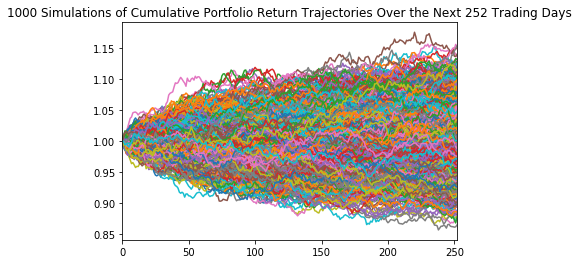

In [33]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the portfolio based on 252 trading days
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [34]:
# Select the last row for project stock prices (prices of each simulation on the last trading day)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    0.945672
1    1.125363
2    0.971121
3    1.050493
4    0.980821
Name: 252, dtype: float64

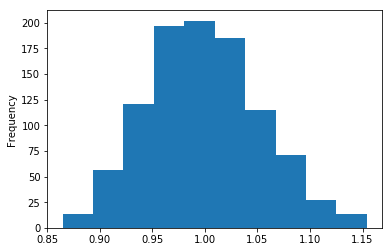

In [35]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
ending_cumulative_returns.plot(kind='hist', bins=10)

In [36]:
# Calculate Quantiles

# 10th percentile
ending_cumulative_returns_10 = ending_cumulative_returns.quantile(q=[.1])

#50th percentile
ending_cumulative_returns_50 = ending_cumulative_returns.quantile(q=[.5])

#90th percentile
ending_cumulative_returns_90 = ending_cumulative_returns.quantile(q=[.9])

#Print results
ending_cumulative_returns_10, ending_cumulative_returns_50, ending_cumulative_returns_90

(0.1    0.92906
 Name: 252, dtype: float64,
 0.5    0.994946
 Name: 252, dtype: float64,
 0.9    1.069302
 Name: 252, dtype: float64)

In [38]:
# Set initial investment
initial_investment = 10000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_10 = initial_investment * ending_cumulative_returns_10.iloc[0]
investment_pnl_50 = initial_investment * ending_cumulative_returns_50.iloc[0]
investment_pnl_90 = initial_investment * ending_cumulative_returns_90.iloc[0]

# Print the results
print(f"At the 10th percentile, an initial investment of $10,000 in the portfolio "
      f"over the next year will be"
      f" ${investment_pnl_10}"
      
      f"At the 50th percentile, an initial investment of $10,000 in the portfolio "
      f"over the next year will be"
      f" ${investment_pnl_50}"
      
      f"At the 90th percentile, an initial investment of $10,000 in the portfolio "
      f"over the next year will be"
      f" ${investment_pnl_90}")

At the 10th percentile, an initial investment of $10,000 in the portfolio over the next year will be $9290.600306109187At the 50th percentile, an initial investment of $10,000 in the portfolio over the next year will be $9949.459901208249At the 90th percentile, an initial investment of $10,000 in the portfolio over the next year will be $10693.023744182732


# Create Plots

# Create Dashboard